**Ejercicio:** Tareas Semana 2<br>
**Por:** Edgar Lizaraazo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create the dataset
sleep_hours = [7, 8, 6, 9, 5, 10, 8, 7, 9, 6]
exam_scores = [85, 92, 78, 98, 62, 100, 94, 82, 96, 75]

data_dict = {"sleep_hours": sleep_hours, "exam_scores": exam_scores}

df = pd.DataFrame(data_dict)

print(df)



   sleep_hours  exam_scores
0            7           85
1            8           92
2            6           78
3            9           98
4            5           62
5           10          100
6            8           94
7            7           82
8            9           96
9            6           75


In [2]:
#Calculos Iniciales
df['xy'] = df['sleep_hours']*df['exam_scores']
df['x2'] = df['sleep_hours']**2
print(df)

   sleep_hours  exam_scores    xy   x2
0            7           85   595   49
1            8           92   736   64
2            6           78   468   36
3            9           98   882   81
4            5           62   310   25
5           10          100  1000  100
6            8           94   752   64
7            7           82   574   49
8            9           96   864   81
9            6           75   450   36


**Actividad 1:** Crear otra columna con enteros y convertirla en flotante.

In [3]:
df['SCORES'] = df['exam_scores'].astype(float)
df

,sleep_hours,exam_scores,xy,x2,SCORES
0,7,85,595,49,85.0
1,8,92,736,64,92.0
2,6,78,468,36,78.0
3,9,98,882,81,98.0
4,5,62,310,25,62.0
5,10,100,1000,100,100.0
6,8,94,752,64,94.0
7,7,82,574,49,82.0
8,9,96,864,81,96.0
9,6,75,450,36,75.0


**Actividad 2:** Como verificar que una columna contiene un string

In [4]:
df['test_string_a']= ['alto','sobresaliente','aceptable','deficiente','aceptable',5, 1, 2, 3, 4]
df['test_string_b']= ['alto','sobresaliente','aceptable','deficiente','alto','sobresaliente','aceptable','deficiente','bajo','alto']
df['test_string_c']= ['alto','sobresaliente','aceptable','deficiente','aceptable',5, 1, 2, 3, 4]

test=['test_string_a','test_string_b','test_string_c']

# Función para verficar si la columna contiene un string
for i in range(3):
  res=df[test[i]].apply(lambda x: isinstance(x, str)).all()
  if res:
    print("La columna:",test[i],", solo contiene valores string")
  else:
    print("La columna:",test[i],", no solo contiene valores string")


La columna: test_string_a , no solo contiene valores string
La columna: test_string_b , solo contiene valores string
La columna: test_string_c , no solo contiene valores string


**Actividad 3:** Eliminar columnas innecesarias

In [5]:
#Nota: Ejecutar línea anterior, para poder eliminar las columnas
#Link: https://docs.kanaries.net/es/topics/Python/dataframe-drop-column
df = df.drop (['test_string_a','test_string_b','test_string_c','SCORES'], axis = 1)
df

,sleep_hours,exam_scores,xy,x2
0,7,85,595,49
1,8,92,736,64
2,6,78,468,36
3,9,98,882,81
4,5,62,310,25
5,10,100,1000,100
6,8,94,752,64
7,7,82,574,49
8,9,96,864,81
9,6,75,450,36


**Actividad 4:** Clasificar en 3 Categorías

In [6]:
#Variable Categórica (Aceptable,Sobresaliente,Excelente)
df['scale_scores'] = np.where(df['exam_scores'] < 50, 'Aceptable', np.where(df['exam_scores']  <= 80,'Sobresaliente','Excelente'))
df

,sleep_hours,exam_scores,xy,x2,scale_scores
0,7,85,595,49,Excelente
1,8,92,736,64,Excelente
2,6,78,468,36,Sobresaliente
3,9,98,882,81,Excelente
4,5,62,310,25,Sobresaliente
5,10,100,1000,100,Excelente
6,8,94,752,64,Excelente
7,7,82,574,49,Excelente
8,9,96,864,81,Excelente
9,6,75,450,36,Sobresaliente


**Actividad 5:** Como usar la función .describe() para incluir variables categóricas

In [7]:
descripcion_completa = df.describe(include='all') #Respuesta dada por ChatGPT
print (descripcion_completa)

        sleep_hours  exam_scores           xy          x2 scale_scores
count     10.000000    10.000000    10.000000   10.000000           10
unique          NaN          NaN          NaN         NaN            2
top             NaN          NaN          NaN         NaN    Excelente
freq            NaN          NaN          NaN         NaN            7
mean       7.500000    86.200000   663.100000   58.500000          NaN
std        1.581139    12.099587   220.032548   23.829254          NaN
min        5.000000    62.000000   310.000000   25.000000          NaN
25%        6.250000    79.000000   494.500000   39.250000          NaN
50%        7.500000    88.500000   665.500000   56.500000          NaN
75%        8.750000    95.500000   836.000000   76.750000          NaN
max       10.000000   100.000000  1000.000000  100.000000          NaN


**Actividad 6:** Carga y descarga de Dataframe como (.xlsx) y (.json)

**Actividad 7:** Matriz de Correlación y Regresión Lineal

Correlation Matrix:
             sleep_hours  exam_scores        xy        x2
sleep_hours     1.000000     0.964107  0.998525  0.995293
exam_scores     0.964107     1.000000  0.972625  0.937217
xy              0.998525     0.972625  1.000000  0.992257
x2              0.995293     0.937217  0.992257  1.000000


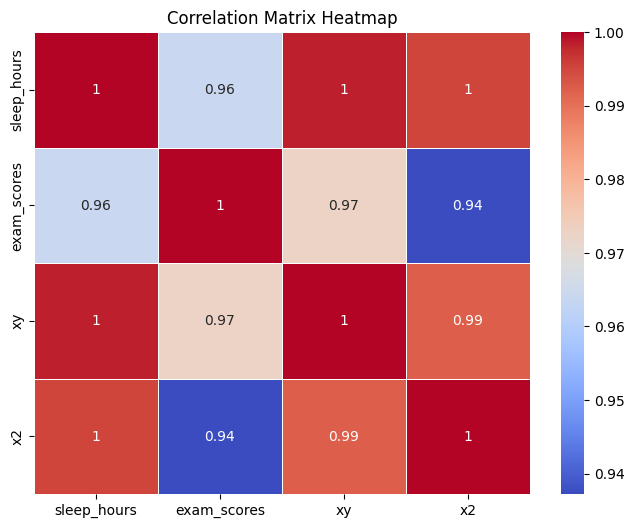

In [8]:
# Calculate the correlation matrix
df = df.drop (['scale_scores'], axis = 1)
correlation_matrix = df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [9]:
sumx=df['sleep_hours'].sum()
sumy=df['exam_scores'].sum()
sumxy=df['xy'].sum()
sumx2=df['x2'].sum()
print("Sumatorias Columnas")
print("Horas_sueño:",sumx,"\nCalificaciones:",sumy,"\nxy:",sumxy,"\nx2:",sumx2)

Sumatorias Columnas
Horas_sueño: 75 
Calificaciones: 862 
xy: 6631 
x2: 585


In [10]:
#Calculo Pendiente
n = int(len(df))
m=(n*sumxy-sumx*sumy)/(n*sumx2-sumx**2)
m=float(m)
#Punto de corte
b=(sumy/n)-m*(sumx/n)
b=float(b)
print("Pendiente:",m,"\nPunto de Corte:",b)

Pendiente: 7.377777777777778 
Punto de Corte: 30.866666666666667


In [11]:
#Calculo Punto Final
xf = df['sleep_hours'].tail(1).values[0]
yf=m*(xf)+b
yf

75.13333333333333

In [12]:
# Crear un dataset
x_final = [0,xf]
y_final = [b,yf]

data_dict_f = {"xf":x_final,
               "yf":y_final}

# Convierte un dictionario en un dataframe
dff = pd.DataFrame(data_dict_f)
dff

,xf,yf
0,0,30.866667
1,6,75.133333


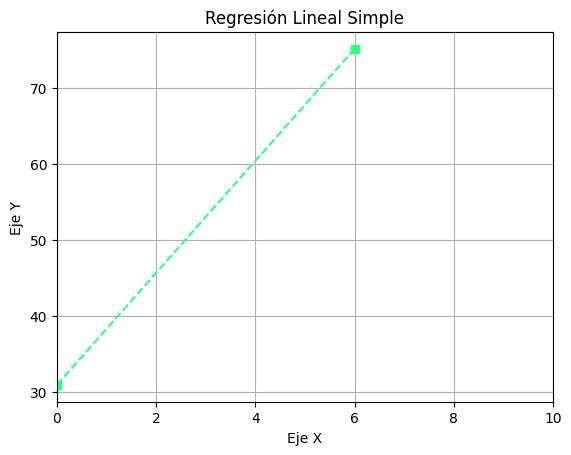

In [14]:
# Crear el gráfico de dispersión
fig, ax = plt.subplots()
ax.scatter(xf, yf,color='#FFAF04')
ax.plot(x_final,y_final,marker='s', linestyle='--', color='#30FF82')

# Añadir títulos y etiquetas
plt.title('Regresión Lineal Simple')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
ax.set_xlim(0, 10)
ax.grid(True)

# Mostrar el gráfico
plt.show()

In [19]:
#Suma cuadrados de residuos: Lista de Comprensión
x = df['sleep_hours']
y = df['exam_scores']
sumf =sum([(y[i] - (m * x[i] + b)) ** 2 for i in range(n)])
print("Sr:", sumf)

Sr: 92.88888888888901


In [20]:
#Suma cuadrados de residuos: Ciclo For
sumf=0
for i in range(n):
    res_sum =(y[i]-(m*x[i]+b))**2
    sumf += res_sum
print("Sr:",sumf)

Sr: 92.88888888888901
